In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np

import os, sys

import utils

from train import train

from best_utils import *

# Preprocessing and import

In [2]:
ROOT_DIR = 'training/'
IMAGE_DIR = ROOT_DIR + 'images/'

In [3]:
#def unstack(img):
#    return np.array([img[:,:,c] for c in range(3)])

#def restack(img):
#    return np.stack(img, axis=-1)

In [4]:
# Read images
files = os.listdir(IMAGE_DIR)
imgs = [load_image(IMAGE_DIR + file) for file in files] # images (400, 400, 3)

In [5]:
# Read groundtruts
GT_DIR = ROOT_DIR + 'groundtruth/'
gt_imgs = [load_image(GT_DIR + file) for file in files] # images (400, 400)

In [6]:
KERNEL_SIDE = 3

# Matrix creation

In [7]:
#features = np.vstack([image_to_features(img, 3) for img in imgs])
features = np.vstack([image_to_features(img, KERNEL_SIDE) for img in imgs[:2]])

In [8]:
#labels = [crop_groundtruth(gt, 3) for gt in gt_imgs]
labels = [crop_groundtruth(gt, KERNEL_SIDE) for gt in gt_imgs[:2]]

In [9]:
features.shape

(320000, 27)

In [10]:
labels = np.ravel(labels)

In [11]:
features.shape, labels.shape

((320000, 27), (320000,))

In [12]:
X = torch.from_numpy(features)
Y = torch.from_numpy(labels)

# Train

In [13]:
import funky

In [14]:
model = nn.Sequential(
    nn.Linear(KERNEL_SIDE**2 * 3, 12),
    nn.Sigmoid(),
    nn.Linear(12, 1),
    #nn.Sigmoid()
)

In [15]:
lr = 0.02
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)#, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)#, momentum=0.9)

costf = torch.nn.MSELoss()

train(X, Y, model, costf, optimizer, 10000, 100)

Epoch [1/10000], Loss: 0.8343
Epoch [101/10000], Loss: 0.5267
Epoch [201/10000], Loss: 0.5173
Epoch [301/10000], Loss: 0.5099
Epoch [401/10000], Loss: 0.5047
Epoch [501/10000], Loss: 0.5025
Epoch [601/10000], Loss: 0.4925
Epoch [701/10000], Loss: 0.4841
Epoch [801/10000], Loss: 0.4793
Epoch [901/10000], Loss: 0.4764
Epoch [1001/10000], Loss: 0.4737
Epoch [1101/10000], Loss: 0.4716
Epoch [1201/10000], Loss: 0.4747
Epoch [1301/10000], Loss: 0.4681
Epoch [1401/10000], Loss: 0.4678
Epoch [1501/10000], Loss: 0.4666
Epoch [1601/10000], Loss: 0.4661
Epoch [1701/10000], Loss: 0.4663
Epoch [1801/10000], Loss: 0.4651
Epoch [1901/10000], Loss: 0.4646
Epoch [2001/10000], Loss: 0.4641
Epoch [2101/10000], Loss: 0.4679
Epoch [2201/10000], Loss: 0.4622
Epoch [2301/10000], Loss: 0.4616
Epoch [2401/10000], Loss: 0.4610
Epoch [2501/10000], Loss: 0.4605
Epoch [2601/10000], Loss: 0.4600
Epoch [2701/10000], Loss: 0.4622
Epoch [2801/10000], Loss: 0.4622
Epoch [2901/10000], Loss: 0.4596
Epoch [3001/10000], Lo

# Test on first image

In [36]:
#img = imgs[0]
img = imgs[20]

test_x = torch.from_numpy(image_to_features(img, KERNEL_SIDE))

In [37]:
preds = model(Variable(test_x))

In [38]:
preds = preds.data.numpy()

In [39]:
np.max(preds)

1.5724138

In [40]:
t = preds_to_tensor(preds, KERNEL_SIDE, 1, 400, 400)

In [41]:
t = t[0]

In [42]:
t[t < 0] = 0
t[t > 0 ] = 1

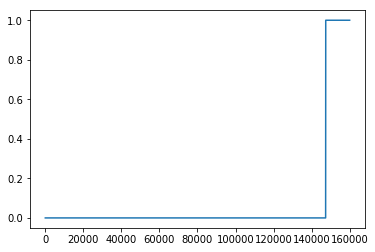

In [43]:
plt.plot(np.sort(t.ravel()))

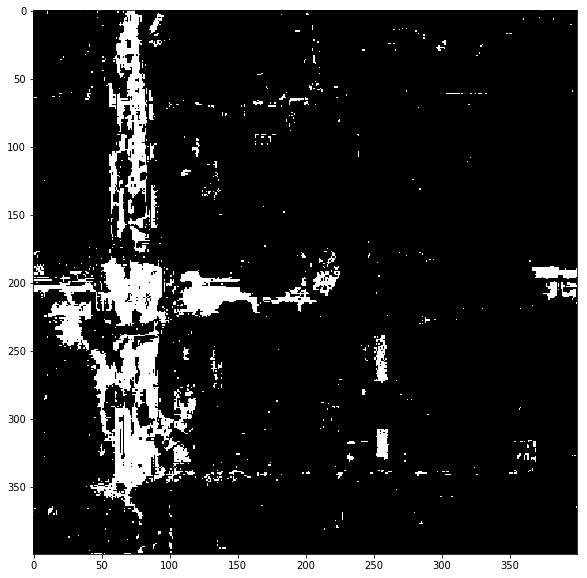

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(t, cmap='Greys_r')

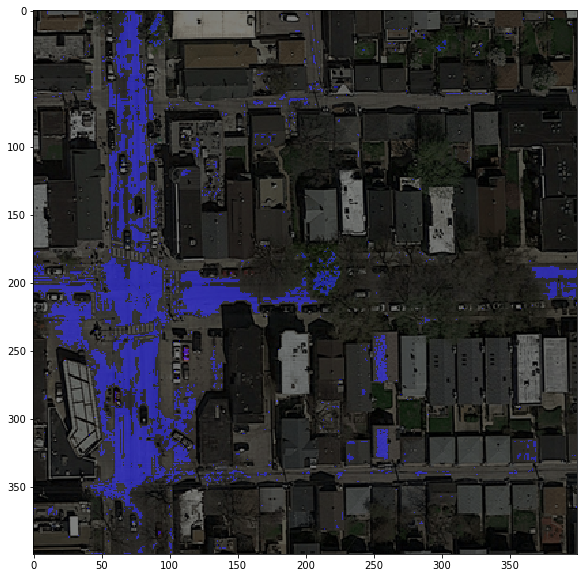

In [45]:
new_img = utils.make_img_overlay(img, t)
plt.figure(figsize=(10,10))
plt.imshow(new_img)

# Old Shit

In [ ]:
# Build train tensor

#X = torch.from_numpy(np.stack(imgs))) # tensor (N, W, H, C)
X = torch.from_numpy(np.stack(imgs[:10]))

In [ ]:
lr = 0.2
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
costf = torch.nn.MSELoss()

In [ ]:
# Build groundtruth tensor

#Y = torch.from_numpy(np.stack(gt_imgs))
Y = torch.from_numpy(np.stack(gt_imgs[:10]))

In [ ]:
train(X, Y, funky.model, costf, optimizer, 50)

In [ ]:
# Choose image to analyze
img = imgs[0]

In [ ]:
test_x.shape, X.shape

In [ ]:
# Predict and give correct shape
test_x = Variable(torch.from_numpy(img).unsqueeze(0))
preds = model(test_x).squeeze(0).data.numpy()

In [ ]:
plt.plot(np.sort(np.ravel(preds)))

In [ ]:
preds.max()

In [ ]:
# Draw
cimg = utils.concatenate_images(img, preds)
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(cimg, cmap='Greys_r')

In [ ]:
new_img = utils.make_img_overlay(img, preds)
plt.figure(figsize=(10,10))
plt.imshow(new_img)